In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data = pd.read_csv('cic_ids_2018.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246730 entries, 0 to 246729
Data columns (total 74 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         246730 non-null  int64  
 1   Dst Port           246730 non-null  int64  
 2   Flow Duration      246730 non-null  int64  
 3   Tot Fwd Pkts       246730 non-null  int64  
 4   Tot Bwd Pkts       246730 non-null  int64  
 5   TotLen Fwd Pkts    246730 non-null  int64  
 6   TotLen Bwd Pkts    246730 non-null  float64
 7   Fwd Pkt Len Max    246730 non-null  int64  
 8   Fwd Pkt Len Min    246730 non-null  int64  
 9   Fwd Pkt Len Mean   246730 non-null  float64
 10  Fwd Pkt Len Std    246730 non-null  float64
 11  Bwd Pkt Len Max    246730 non-null  int64  
 12  Bwd Pkt Len Min    246730 non-null  int64  
 13  Bwd Pkt Len Mean   246730 non-null  float64
 14  Bwd Pkt Len Std    246730 non-null  float64
 15  Flow IAT Mean      246730 non-null  float64
 16  Fl

In [14]:
data = data[0:100000]

In [15]:
data.head()

,Unnamed: 0,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,3389,1665875,8,7,1128,1581.0,661,0,141.00,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,1,53,67765,2,2,94,268.0,47,47,47.00,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,2,0,213190,5,0,0,0.0,0,0,0.00,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,3,41967,86370853,2,0,0,0.0,0,0,0.00,...,20,0.0,0.0,0.0,0.0,86400000.0,0.0,86400000.0,86400000.0,Benign
4,4,80,5113386,4,4,97,231.0,97,0,24.25,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [16]:
data.describe()

,Unnamed: 0,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.00000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05
mean,49999.500000,4506.101540,-1.098003e+05,5.020170,5.072100,363.118460,2.238683e+03,186.157220,4.580400,44.857947,...,2.163840,25.22132,5.412155e+04,2.079681e+04,8.059192e+04,4.110273e+04,2.793118e+06,6.410571e+04,2.845816e+06,2.732993e+06
std,28867.657797,11401.734041,2.154913e+09,28.453862,69.475668,789.248636,9.990337e+04,249.589048,14.871734,53.906685,...,5.199781,9.73354,7.537919e+05,5.038152e+05,1.055579e+06,6.232766e+05,1.164409e+07,1.134720e+06,1.179864e+07,1.156319e+07
min,0.000000,0.000000,-6.814020e+11,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,24999.750000,22.000000,4.300000e+01,1.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,20.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,49999.500000,80.000000,1.019600e+04,2.000000,1.000000,36.000000,5.100000e+01,34.000000,0.000000,25.666667,...,0.000000,20.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,74999.250000,8080.000000,1.670039e+06,4.000000,4.000000,354.000000,6.620000e+02,326.000000,0.000000,87.636364,...,1.000000,32.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,99999.000000,65513.000000,1.199996e+08,4257.000000,8725.000000,59064.000000,1.272968e+07,1460.000000,565.000000,1393.666667,...,558.000000,40.00000,7.620000e+07,5.470000e+07,8.240000e+07,7.620000e+07,1.195160e+08,5.474350e+07,1.195160e+08,1.195160e+08


<AxesSubplot:>

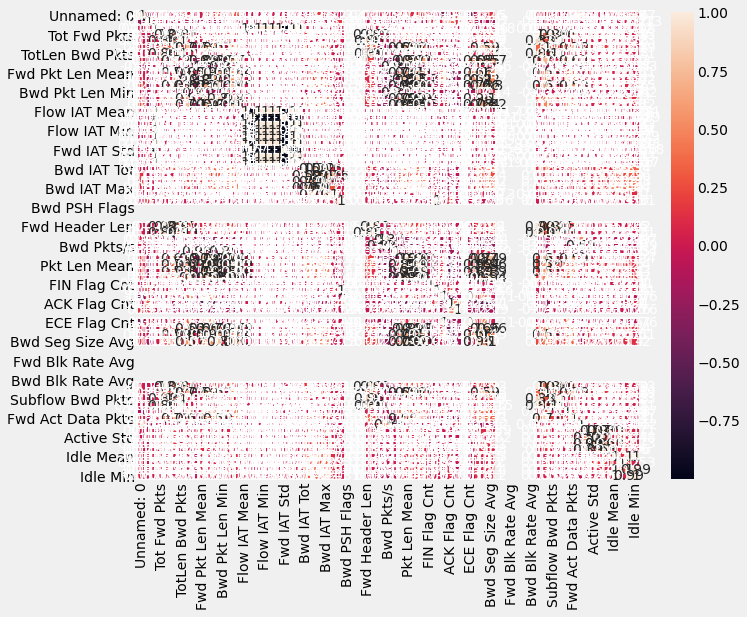

In [17]:
f, ax = plt.subplots(1, figsize=(10,8))
sns.heatmap(data.corr(), annot=True, ax=ax)

In [18]:
np.shape(data)

(100000, 74)

<AxesSubplot:xlabel='Label', ylabel='count'>

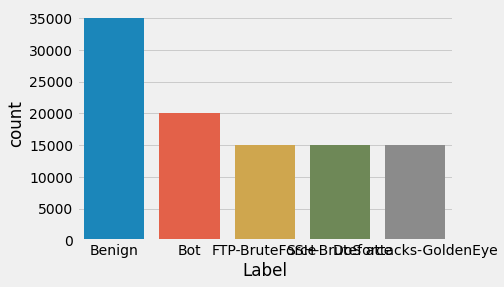

In [19]:
sns.countplot(x=data['Label'])

In [20]:
data['Label'].value_counts()

Benign                   35000
Bot                      20000
FTP-BruteForce           15000
SSH-Bruteforce           15000
DoS attacks-GoldenEye    15000
Name: Label, dtype: int64

In [21]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
data['Label']= label_encoder.fit_transform(data['Label'])

data['Label'].unique()

array([0, 1, 3, 4, 2])

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 74 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         100000 non-null  int64  
 1   Dst Port           100000 non-null  int64  
 2   Flow Duration      100000 non-null  int64  
 3   Tot Fwd Pkts       100000 non-null  int64  
 4   Tot Bwd Pkts       100000 non-null  int64  
 5   TotLen Fwd Pkts    100000 non-null  int64  
 6   TotLen Bwd Pkts    100000 non-null  float64
 7   Fwd Pkt Len Max    100000 non-null  int64  
 8   Fwd Pkt Len Min    100000 non-null  int64  
 9   Fwd Pkt Len Mean   100000 non-null  float64
 10  Fwd Pkt Len Std    100000 non-null  float64
 11  Bwd Pkt Len Max    100000 non-null  int64  
 12  Bwd Pkt Len Min    100000 non-null  int64  
 13  Bwd Pkt Len Mean   100000 non-null  float64
 14  Bwd Pkt Len Std    100000 non-null  float64
 15  Flow IAT Mean      100000 non-null  float64
 16  Flo

# FEature Selection

In [23]:
Y = data['Label']
X = data.drop('Label',1)

<ipython-input-23-082a2d66f592>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('Label',1)


PCA with RFE 

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
model = LogisticRegression()

rfe = RFE(model, 12)
rfe = rfe.fit(X, Y)

# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

C:\Users\Public\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=12 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\Public\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Public\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase th

C:\Users\Public\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Public\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_

C:\Users\Public\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Public\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Public\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Public\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Selected features: ['Flow IAT Std', 'Flow IAT Max', 'Fwd IAT Std', 'Fwd IAT Max', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Idle Mean', 'Idle Max']


C:\Users\Public\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['Flow IAT Std', 'Flow IAT Max', 'Fwd IAT Std', 'Fwd IAT Max', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Idle Mean', 'Idle Max']


In [37]:
Selected_features = ['Flow IAT Std', 'Flow IAT Max', 'Fwd IAT Std', 'Fwd IAT Max', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Idle Mean', 'Idle Max']
X = data[Selected_features]

In [38]:
X

,Flow IAT Std,Flow IAT Max,Fwd IAT Std,Fwd IAT Max,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Fwd Pkts/s,Bwd Pkts/s,Idle Mean,Idle Max
0,2.455789e+05,953123.0,3.901087e+05,1117799.0,1557513.0,2.595855e+05,3.404719e+05,953123.0,4.802281,4.201996,0.0,0.0
1,1.963288e+04,35839.0,0.000000e+00,31893.0,33.0,3.300000e+01,0.000000e+00,33.0,29.513761,29.513761,0.0,0.0
2,1.045337e+05,210095.0,1.045337e+05,210095.0,0.0,0.000000e+00,0.000000e+00,0.0,23.453258,0.000000,0.0,0.0
3,0.000000e+00,86400000.0,0.000000e+00,86400000.0,0.0,0.000000e+00,0.000000e+00,0.0,0.023156,0.000000,86400000.0,86400000.0
4,1.905534e+06,5051521.0,3.545452e+04,61561.0,5113242.0,1.704414e+06,2.951648e+06,5112684.0,0.782261,0.782261,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.888444e+06,5000239.0,1.335789e+04,23297.0,5023856.0,1.674619e+06,2.880355e+06,5000540.0,0.796201,0.796201,0.0,0.0
99996,2.579590e+06,6848918.0,3.400223e+06,6849833.0,6850049.0,3.425024e+06,4.842117e+06,6848918.0,0.714035,0.428421,6848918.0,6848918.0
99997,1.885778e+06,5003709.0,5.235007e+04,90861.0,5094941.0,1.698314e+06,2.863174e+06,5004012.0,0.785092,0.785092,0.0,0.0
99998,3.091167e+04,83062.0,4.004190e+04,83062.0,9717.0,4.858500e+03,4.902371e+03,8325.0,53.737439,32.242463,0.0,0.0


In [39]:
X.to_csv('test.csv')

In [40]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
99995    2
99996    2
99997    2
99998    2
99999    2
Name: Label, Length: 100000, dtype: int32

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Support Vector Machine

In [43]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X_train, y_train)
predictions = SVM.predict(X_test)
val1 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for SVM: ", val1, "\n")
print("*Confusion Matrix for SVM: ")
print(confusion_matrix(y_test, predictions))

*Accuracy score for SVM:  34.844 

*Confusion Matrix for SVM: 
[[8627    0    8    0    0]
 [5180    0    0    0    0]
 [3655    0   84    0    0]
 [3660    0    0    0    0]
 [3786    0    0    0    0]]


# Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
predictions = RF.predict(X_test)
val2 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for RF: ", val2, "\n")
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y_test, predictions))

*Accuracy score for RF:  98.248 

*Confusion Matrix for RF: 
[[8479   14   27  100   15]
 [  17 5163    0    0    0]
 [  12    0 3727    0    0]
 [  57    0    0 3544   59]
 [  25    0    0  112 3649]]


# Voting Classifier

In [46]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = SVC(gamma='auto')
clf2 = RandomForestClassifier(n_estimators=5, random_state=1)
clf3 = DecisionTreeClassifier()
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("*Confusion Matrix for Voting Classifier: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for Voting Classifier: 
[[8483   14   23  100   15]
 [  28 5152    0    0    0]
 [  23    0 3716    0    0]
 [  57    0    0 3544   59]
 [  30    0    0  112 3644]]


In [47]:
val3 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for Voting: ", val3, "\n")

*Accuracy score for Voting:  98.156 



# Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
predictions = DT.predict(X_test)
val4 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for DT: ", val4, "\n")
print("*Confusion Matrix for DT: ")
print(confusion_matrix(y_test, predictions))

*Accuracy score for DT:  98.092 

*Confusion Matrix for DT: 
[[8459   19   37  101   19]
 [  25 5155    0    0    0]
 [  21    0 3718    0    0]
 [  57    0    0 3544   59]
 [  27    0    0  112 3647]]


# KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
predictions = KNN.predict(X_test)
val5 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for KNN: ", val5, "\n")
print("*Confusion Matrix for KNN: ")
print(confusion_matrix(y_test, predictions))

*Accuracy score for KNN:  98.044 

*Confusion Matrix for KNN: 
[[8472   22   53   67   21]
 [  12 5166    2    0    0]
 [  16    0 3723    0    0]
 [  74    0    0 3452  134]
 [  26    0    0   62 3698]]


# Naive Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)
predictions = NB.predict(X_test)
val6 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for NB: ", val6, "\n")
print("*Confusion Matrix for NB: ")
print(confusion_matrix(y_test, predictions))

*Accuracy score for NB:  35.512 

*Confusion Matrix for NB: 
[[ 776  331 2392 4190  946]
 [   1    0    5 5106   68]
 [ 105  733 2615    0  286]
 [   0    0    0 3660    0]
 [   0    0    0 1959 1827]]


# Linear Discriminant Analysis

In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)
predictions = LDA.predict(X_test)
val7 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for LDA: ", val7, "\n")
print("*Confusion Matrix for LDA: ")
print(confusion_matrix(y_test, predictions))

*Accuracy score for LDA:  56.564 

*Confusion Matrix for LDA: 
[[7997    0  628    8    2]
 [5180    0    0    0    0]
 [1609    0 2130    0    0]
 [ 410    0    0 2891  359]
 [2662    0    0    1 1123]]


# Logistic Regession

In [52]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
predictions = LR.predict(X_test)
val8 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for LR: ", val8, "\n")
print("*Confusion Matrix for LR: ")
print(confusion_matrix(y_test, predictions))

*Accuracy score for LR:  41.796 

*Confusion Matrix for LR: 
[[4557   29  733 3314    2]
 [ 132    0 2459 2589    0]
 [1507    0 2232    0    0]
 [   0    0    0 3660    0]
 [1827    0    0 1959    0]]


C:\Users\Public\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Machine Learning Comparison

In [54]:
score = [val1,val2,val3,val4,val5,val6,val7,val8]

In [55]:
#make variabel for save the result and to show it
classifier = ('SVM','RF','Voting','DT','KNN','NB','LDA','LR')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2 3 4 5 6 7]
[34.844, 98.248, 98.156, 98.092, 98.044, 35.512, 56.564, 41.796]


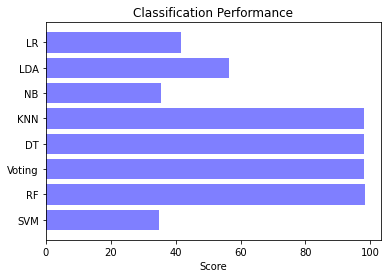

In [56]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()

In [57]:
import joblib
filename = 'model.sav'
joblib.dump(eclf1, filename)

['model.sav']

# K-Means

In [60]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
kmeans.predict(X_test)

kmeans.cluster_centers_

array([[ 8.23712146e+05,  3.93255187e+06,  6.00427153e+05,
         3.65336273e+06,  3.94378098e+06,  5.40078933e+05,
         6.45066734e+05,  1.55430501e+06,  1.13936251e+05,
         1.03773411e+05,  2.80814615e+06,  2.86077588e+06],
       [ 2.56344593e+11, -1.59438000e+11,  2.56344593e+11,
        -1.59438000e+11,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

# Deep Learning

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
from sklearn.metrics import log_loss
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

In [5]:
from sklearn.preprocessing import Normalizer
from keras.layers import Activation, Dense, Dropout, BatchNormalization, Input
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
%matplotlib inline
plt.style.use('fivethirtyeight')

In [26]:
data = pd.read_csv('test.csv')

In [28]:
data

,Unnamed: 0,Flow IAT Std,Flow IAT Max,Fwd IAT Std,Fwd IAT Max,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Fwd Pkts/s,Bwd Pkts/s,Idle Mean,Idle Max
0,0,2.455789e+05,953123.0,3.901087e+05,1117799.0,1557513.0,2.595855e+05,3.404719e+05,953123.0,4.802281,4.201996,0.0,0.0
1,1,1.963288e+04,35839.0,0.000000e+00,31893.0,33.0,3.300000e+01,0.000000e+00,33.0,29.513761,29.513761,0.0,0.0
2,2,1.045337e+05,210095.0,1.045337e+05,210095.0,0.0,0.000000e+00,0.000000e+00,0.0,23.453258,0.000000,0.0,0.0
3,3,0.000000e+00,86400000.0,0.000000e+00,86400000.0,0.0,0.000000e+00,0.000000e+00,0.0,0.023156,0.000000,86400000.0,86400000.0
4,4,1.905534e+06,5051521.0,3.545452e+04,61561.0,5113242.0,1.704414e+06,2.951648e+06,5112684.0,0.782261,0.782261,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1.888444e+06,5000239.0,1.335789e+04,23297.0,5023856.0,1.674619e+06,2.880355e+06,5000540.0,0.796201,0.796201,0.0,0.0
99996,99996,2.579590e+06,6848918.0,3.400223e+06,6849833.0,6850049.0,3.425024e+06,4.842117e+06,6848918.0,0.714035,0.428421,6848918.0,6848918.0
99997,99997,1.885778e+06,5003709.0,5.235007e+04,90861.0,5094941.0,1.698314e+06,2.863174e+06,5004012.0,0.785092,0.785092,0.0,0.0
99998,99998,3.091167e+04,83062.0,4.004190e+04,83062.0,9717.0,4.858500e+03,4.902371e+03,8325.0,53.737439,32.242463,0.0,0.0


In [29]:
data.shape

(100000, 13)

In [30]:
X = data.drop('Unnamed: 0',1)

<ipython-input-30-39cad9939ac4>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('Unnamed: 0',1)


For CNN

In [31]:
X

,Flow IAT Std,Flow IAT Max,Fwd IAT Std,Fwd IAT Max,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Fwd Pkts/s,Bwd Pkts/s,Idle Mean,Idle Max
0,2.455789e+05,953123.0,3.901087e+05,1117799.0,1557513.0,2.595855e+05,3.404719e+05,953123.0,4.802281,4.201996,0.0,0.0
1,1.963288e+04,35839.0,0.000000e+00,31893.0,33.0,3.300000e+01,0.000000e+00,33.0,29.513761,29.513761,0.0,0.0
2,1.045337e+05,210095.0,1.045337e+05,210095.0,0.0,0.000000e+00,0.000000e+00,0.0,23.453258,0.000000,0.0,0.0
3,0.000000e+00,86400000.0,0.000000e+00,86400000.0,0.0,0.000000e+00,0.000000e+00,0.0,0.023156,0.000000,86400000.0,86400000.0
4,1.905534e+06,5051521.0,3.545452e+04,61561.0,5113242.0,1.704414e+06,2.951648e+06,5112684.0,0.782261,0.782261,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.888444e+06,5000239.0,1.335789e+04,23297.0,5023856.0,1.674619e+06,2.880355e+06,5000540.0,0.796201,0.796201,0.0,0.0
99996,2.579590e+06,6848918.0,3.400223e+06,6849833.0,6850049.0,3.425024e+06,4.842117e+06,6848918.0,0.714035,0.428421,6848918.0,6848918.0
99997,1.885778e+06,5003709.0,5.235007e+04,90861.0,5094941.0,1.698314e+06,2.863174e+06,5004012.0,0.785092,0.785092,0.0,0.0
99998,3.091167e+04,83062.0,4.004190e+04,83062.0,9717.0,4.858500e+03,4.902371e+03,8325.0,53.737439,32.242463,0.0,0.0


In [32]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
99995    2
99996    2
99997    2
99998    2
99999    2
Name: Label, Length: 100000, dtype: int32

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)

In [34]:
X_train = X_train.values
X_test = X_test.values
X_train = X_train.reshape(-1, X_train.shape[1],1)
X_test = X_test.reshape(-1, X_test.shape[1],1)

In [35]:
Y_train=to_categorical(y_train)
Y_test=to_categorical(y_test)

# CNN

In [38]:
verbose, epoch, batch_size = 1, 100, 32
activationFunction='relu'

def getModel():
    
    cnnmodel = Sequential()
    #cnnmodel.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
    #cnnmodel.add(MaxPooling1D(pool_size=2))
    cnnmodel.add(Conv1D(filters=128, kernel_size=2, activation='relu',input_shape=(X_train.shape[1],X_train.shape[2])))
    cnnmodel.add(MaxPooling1D(pool_size=2))
    cnnmodel.add(Dropout(rate=0.2))
    cnnmodel.add(Flatten())
    cnnmodel.add(Dense(64, activation='relu'))
    cnnmodel.add(Dense(32, activation='relu'))
    cnnmodel.add(Dense(5, activation='softmax'))
    cnnmodel.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    cnnmodel.summary()
    return cnnmodel

cnnmodel = getModel()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 11, 128)           384       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 5, 128)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 128)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 640)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                41024     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 5)                

In [40]:
modelhistory= cnnmodel.fit(X_train, Y_train, epochs=20,steps_per_epoch=2, verbose=verbose, validation_split=0.2, batch_size = batch_size)

Epoch 1/20
2/2 [==============================] - 0s 154ms/step - loss: 54079.9805 - accuracy: 0.2656 - val_loss: 73659.6328 - val_accuracy: 0.2919
Epoch 2/20
2/2 [==============================] - 0s 147ms/step - loss: 32377.1172 - accuracy: 0.2344 - val_loss: 30194.9727 - val_accuracy: 0.2953
Epoch 3/20
2/2 [==============================] - 0s 144ms/step - loss: 124432.1875 - accuracy: 0.2656 - val_loss: 112310.1250 - val_accuracy: 0.2996
Epoch 4/20
2/2 [==============================] - 0s 146ms/step - loss: 95748.1562 - accuracy: 0.2969 - val_loss: 161000.5781 - val_accuracy: 0.2993
Epoch 5/20
2/2 [==============================] - 0s 146ms/step - loss: 54970.9531 - accuracy: 0.2344 - val_loss: 102127.5312 - val_accuracy: 0.3155
Epoch 6/20
2/2 [==============================] - 0s 145ms/step - loss: 145177.5312 - accuracy: 0.2656 - val_loss: 36205.9102 - val_accuracy: 0.3475
Epoch 7/20
2/2 [==============================] - 0s 145ms/step - loss: 77559.7188 - accuracy: 0.2344 - val

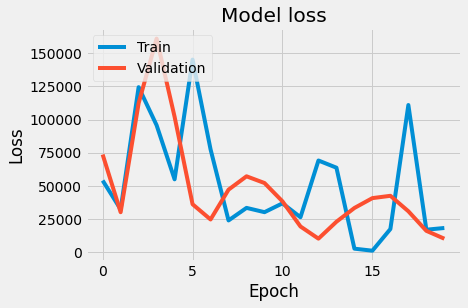

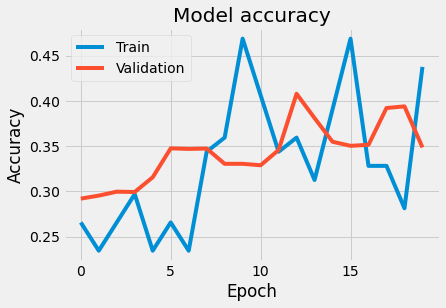

In [41]:
# Plot training & validation loss values
plt.plot(modelhistory.history['loss'])
plt.plot(modelhistory.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss.png', format='png', dpi=1200)
plt.show()


# Plot training & validation accuracy values
plt.plot(modelhistory.history['accuracy'])
plt.plot(modelhistory.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy.png', format='png', dpi=1200)
plt.show()

In [42]:
cnnpredictions = cnnmodel.predict(X_test, verbose=1)
cnn_predict=np.argmax(cnnpredictions,axis=1)
cnn_actual_value=np.argmax(Y_test,axis=1)

acc_cnn = accuracy_score(cnn_actual_value, cnn_predict) * 100

782/782 [==============================] - 0s 562us/step


# CNN + LSTM Ensemble Method

In [43]:
import tensorflow as tf
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([tf.keras.layers.Conv1D(filters=64,kernel_size=5,strides=1,padding="causal",activation="relu",input_shape=(X_train.shape[1],X_train.shape[2])),
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding="valid"),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding="valid"),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(5)
])

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(5e-4,
                                                             decay_steps=1000000,
                                                             decay_rate=0.98,
                                                             staircase=False)

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.8),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 12, 64)            384       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 11, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 11, 32)            6176      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 10, 32)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 10, 128)           82432     
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [44]:
history = model.fit(X_train, Y_train,epochs=10)

Epoch 1/10
2344/2344 [==============================] - 18s 8ms/step - loss: 0.1424 - accuracy: 0.4755
Epoch 2/10
2344/2344 [==============================] - 17s 7ms/step - loss: 0.1126 - accuracy: 0.5768
Epoch 3/10
2344/2344 [==============================] - 17s 7ms/step - loss: 0.1045 - accuracy: 0.6443
Epoch 4/10
2344/2344 [==============================] - 17s 7ms/step - loss: 0.0986 - accuracy: 0.6675
Epoch 5/10
2344/2344 [==============================] - 17s 7ms/step - loss: 0.0954 - accuracy: 0.6873
Epoch 6/10
2344/2344 [==============================] - 18s 8ms/step - loss: 0.0985 - accuracy: 0.6661
Epoch 7/10
2344/2344 [==============================] - 18s 8ms/step - loss: 0.0965 - accuracy: 0.6608
Epoch 8/10
2344/2344 [==============================] - 17s 7ms/step - loss: 0.0975 - accuracy: 0.6500
Epoch 9/10
2344/2344 [==============================] - 17s 7ms/step - loss: 0.0939 - accuracy: 0.6638
Epoch 10/10
2344/2344 [==============================] - 17s 7ms/step - l

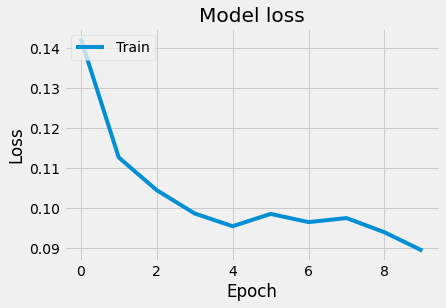

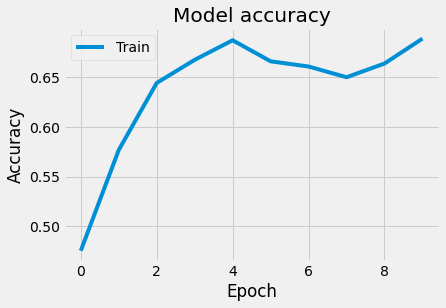

In [45]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss.png', format='png', dpi=1200)
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy.png', format='png', dpi=1200)
plt.show()

In [46]:
predictions = model.predict(X_test, verbose=1)
predict=np.argmax(predictions,axis=1)
actual_value=np.argmax(Y_test,axis=1)

acc_ense = accuracy_score(actual_value, predict) * 100

782/782 [==============================] - 2s 3ms/step


# Autoencoder

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, BatchNormalization, Input
from keras import regularizers
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

np.set_printoptions(suppress=True)

In [57]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)

In [58]:
train_min = x_train.min()
train_max = x_train.max()
x_train = (x_train - train_min) / (train_max - train_min)
x_test = (x_test - train_min) / (train_max - train_min)

In [59]:
positives = x_train[y_train == 1]
negatives = x_train[y_train == 0]

In [60]:
## input layer 
input_layer = Input(shape=negatives.shape[1:])

## encoding part
encoded = Dense(100, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = BatchNormalization()(encoded)
encoded = Dense(75, activation='tanh')(encoded)
encoded = BatchNormalization()(encoded)
encoded = Dense(50, activation='relu')(encoded)
encoded = BatchNormalization()(encoded)
encoded = Dense(25, activation='relu')(encoded)
encoded = BatchNormalization()(encoded)
encoded = Dense(7, activation='relu')(encoded)

## decoding part
decoded = Dense(7, activation='relu')(encoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(25, activation='relu')(decoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(50, activation='relu')(decoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(75, activation='tanh')(decoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(100, activation='tanh')(decoded)

## output layer
output_layer = Dense(negatives.shape[1], activation='relu')(decoded)

In [61]:
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer="adadelta", loss="mse")

In [62]:
autoencoder.fit(negatives, negatives, batch_size = 15, epochs = 10, shuffle = True)

Epoch 1/10
1977/1977 [==============================] - 4s 2ms/step - loss: 0.3078
Epoch 2/10
1977/1977 [==============================] - 4s 2ms/step - loss: 0.2424
Epoch 3/10
1977/1977 [==============================] - 3s 2ms/step - loss: 0.2036
Epoch 4/10
1977/1977 [==============================] - 3s 2ms/step - loss: 0.1765
Epoch 5/10
1977/1977 [==============================] - 3s 2ms/step - loss: 0.1586
Epoch 6/10
1977/1977 [==============================] - 4s 2ms/step - loss: 0.1455
Epoch 7/10
1977/1977 [==============================] - 3s 2ms/step - loss: 0.1349
Epoch 8/10
1977/1977 [==============================] - 3s 2ms/step - loss: 0.1275
Epoch 9/10
1977/1977 [==============================] - 3s 2ms/step - loss: 0.1203
Epoch 10/10
1977/1977 [==============================] - 3s 2ms/step - loss: 0.1133


In [63]:
hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])
hidden_representation.add(autoencoder.layers[3])
hidden_representation.add(autoencoder.layers[4])
hidden_representation.add(autoencoder.layers[5])
hidden_representation.add(autoencoder.layers[6])
hidden_representation.add(autoencoder.layers[7])
hidden_representation.add(autoencoder.layers[8])
hidden_representation.add(autoencoder.layers[9])

In [64]:
x_train_transformed = hidden_representation.predict(x_train)
x_test_transformed = hidden_representation.predict(x_test)

In [65]:
predictor = Sequential()
predictor.add(Dense(64, activation='relu', input_shape=x_train_transformed.shape[1:]))
predictor.add(BatchNormalization())
predictor.add(Dropout(0.25))
predictor.add(Dense(64, activation='relu'))
predictor.add(BatchNormalization())
predictor.add(Dense(64, activation='relu'))
predictor.add(BatchNormalization())
predictor.add(Dense(64, activation='tanh'))
predictor.add(BatchNormalization())
predictor.add(Dense(1, activation='sigmoid'))

In [67]:
predictor.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
predictor.fit(x_train_transformed, y_train, batch_size=10, epochs=10, shuffle=True)

Epoch 1/10
8500/8500 [==============================] - 9s 1ms/step - loss: -6966.6875 - accuracy: 0.2717
Epoch 2/10
8500/8500 [==============================] - 9s 1ms/step - loss: -29907.5156 - accuracy: 0.2791
Epoch 3/10
8500/8500 [==============================] - 8s 1000us/step - loss: -67811.3828 - accuracy: 0.2847
Epoch 4/10
8500/8500 [==============================] - 8s 971us/step - loss: -120206.6016 - accuracy: 0.2880
Epoch 5/10
8500/8500 [==============================] - 8s 928us/step - loss: -187291.7031 - accuracy: 0.2896
Epoch 6/10
8500/8500 [==============================] - 8s 967us/step - loss: -268844.2500 - accuracy: 0.2841
Epoch 7/10
8500/8500 [==============================] - 10s 1ms/step - loss: -364305.0938 - accuracy: 0.2826
Epoch 8/10
8500/8500 [==============================] - 9s 1ms/step - loss: -475694.3438 - accuracy: 0.2847
Epoch 9/10
8500/8500 [==============================] - 8s 979us/step - loss: -600015.1875 - accuracy: 0.2855
Epoch 10/10
8500/850

In [68]:
y_predict = predictor.predict(x_test_transformed)

In [71]:
ae = accuracy_score(y_test, y_predict >= 0.35)

In [70]:
print(classification_report(y_test, y_predict >= 0.35))

              precision    recall  f1-score   support

           0       0.97      0.53      0.68      5349
           1       0.25      1.00      0.40      3003
           2       0.00      0.00      0.00      2228
           3       0.00      0.00      0.00      2236
           4       0.00      0.00      0.00      2184

    accuracy                           0.39     15000
   macro avg       0.24      0.31      0.22     15000
weighted avg       0.40      0.39      0.32     15000



C:\Users\Public\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Public\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Public\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Accuracy Comparison

In [78]:
score = [acc_cnn,acc_ense,ae*100]

In [79]:
#make variabel for save the result and to show it
classifier = ('CNN','CNN+LSTM','Autoencoder')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2]
[34.44, 59.484, 38.81333333333333]


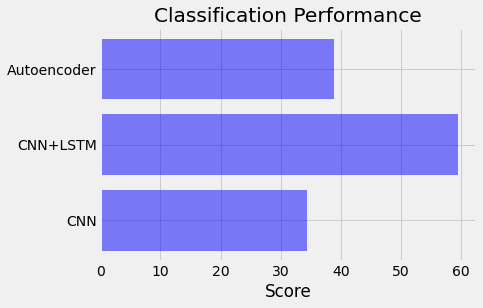

In [80]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()